In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # do not use GPU
%env SM_FRAMEWORK=tf.keras
from bfseg.data.meshdist.dataLoader import DataLoader
from bfseg.utils.losses import ignorant_cross_entropy_loss
from bfseg.utils.metrics import IgnorantAccuracyMetric, IgnorantBalancedAccuracyMetric
from bfseg.utils.evaluation import scoreAndPlotPredictions
import segmentation_models as sm
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 40]
workingdir = "/home/rene/cla_dataset/sp_slac/"
validationDir ='/home/rene/hiveLabels/'
# Desired image shape. Input images will be cropped + scaled to this shape
image_w = 720
image_h = 480
dataLoaderArche = DataLoader(workingdir, [image_h, image_w],  validationDir = validationDir, validationMode="ARCHE", batchSize=5)
dataLoaderCLA = DataLoader(workingdir, [image_h, image_w],  validationDir = validationDir, validationMode="CLA", batchSize=5)

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [2]:

train_ds, test_ds = dataLoaderCLA.getDataset()
for img, label in train_ds.take(1):
    break

In [4]:
img.shape

TensorShape([5, 480, 720, 3])

In [6]:
from bfseg.models.deeplab import Deeplabv3
deeplab_model = Deeplabv3(input_shape=(480, 720, 3), classes = 2)

In [7]:
deeplab_model.compile(
    loss=ignorant_cross_entropy_loss,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


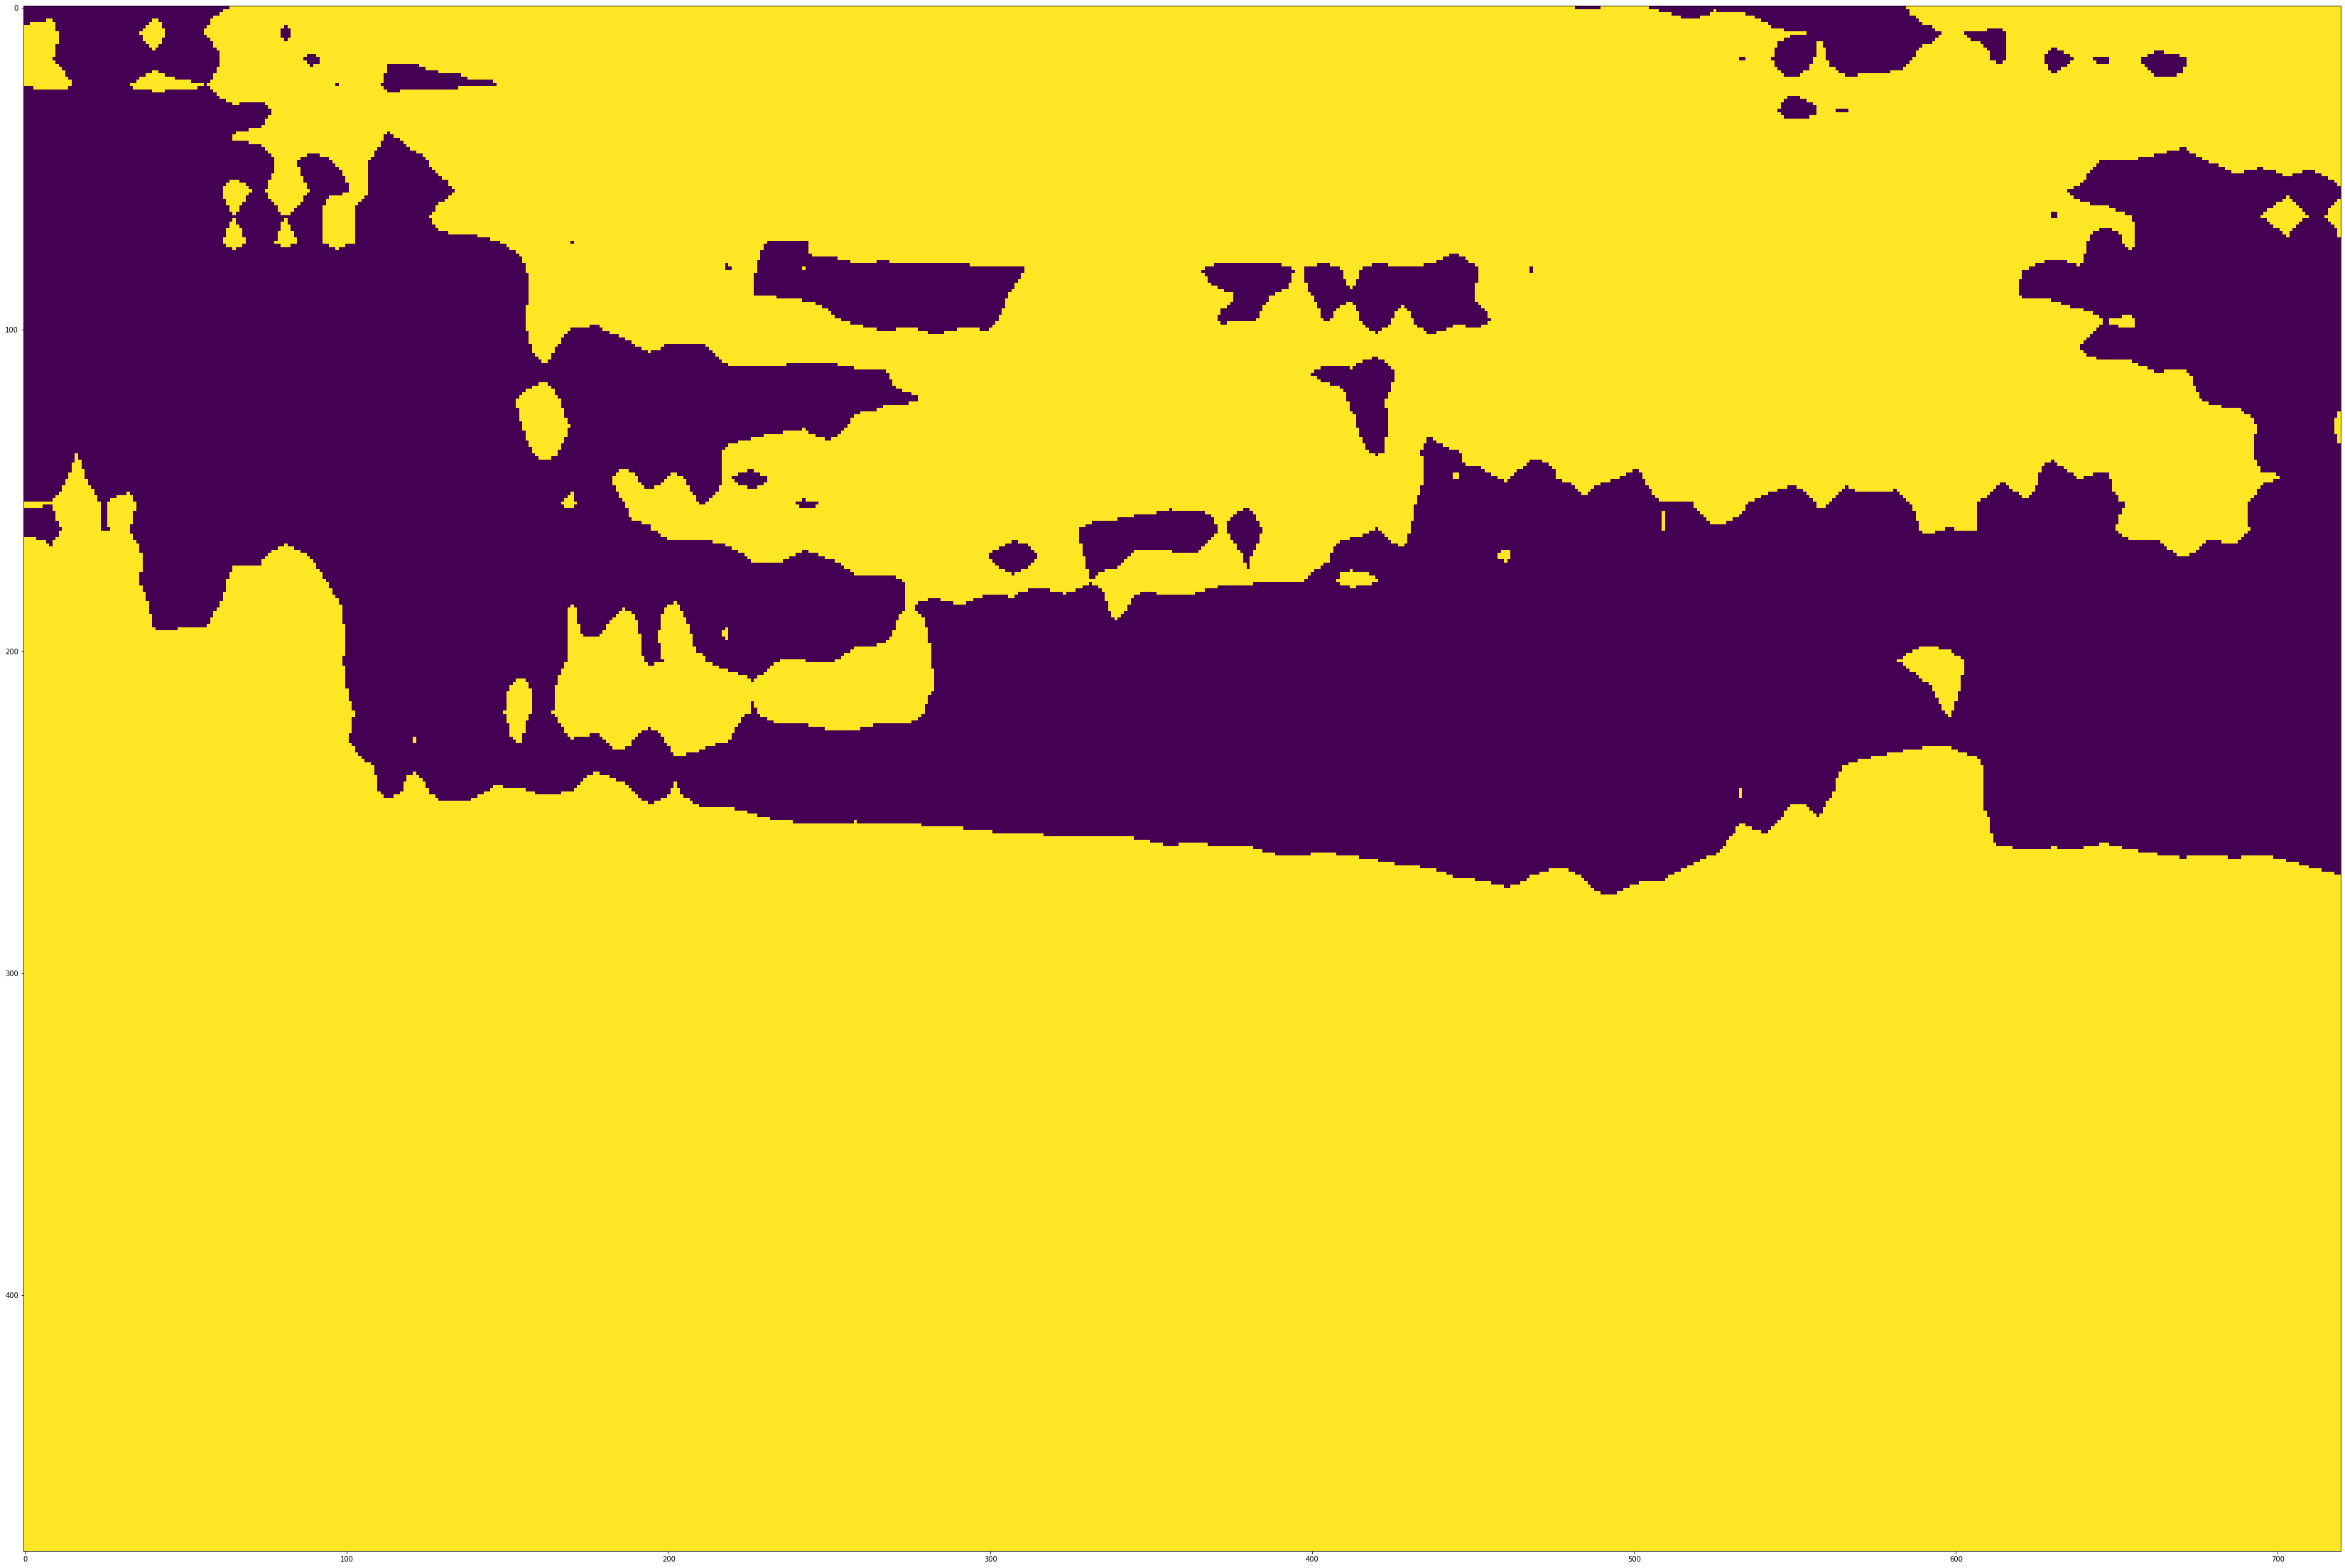

In [10]:
plt.imshow(tf.argmax(deeplab_model.predict(img), axis = -1)[0])